## Problem 1

In [2]:
%%bash
cd /Users/jasminetong/Documents/Master@Harvard-MIT/2017_Fall/CS207/cs207_Jiawen_Tong/homeworks/HW3/tmp
git clone https://github.com/JasmineeeeeTONG/playground.git

Cloning into 'playground'...


In [3]:
%%bash
cd /Users/jasminetong/Documents/Master@Harvard-MIT/2017_Fall/CS207/cs207_Jiawen_Tong/homeworks/HW3/tmp/playground
git pull origin mybranch1
ls

Merge made by the 'recursive' strategy.
 books.md | 1 +
 1 file changed, 1 insertion(+)
 create mode 100644 books.md
README.md
books.md
feature.txt
intro.md
world.md


From https://github.com/JasmineeeeeTONG/playground
 * branch            mybranch1  -> FETCH_HEAD


In [4]:
%%bash
cd /Users/jasminetong/Documents/Master@Harvard-MIT/2017_Fall/CS207/cs207_Jiawen_Tong/homeworks/HW3/tmp/playground
git status

On branch master
Your branch is ahead of 'origin/master' by 2 commits.
  (use "git push" to publish your local commits)
nothing to commit, working tree clean


In [5]:
%%bash
cd /Users/jasminetong/Documents/Master@Harvard-MIT/2017_Fall/CS207/cs207_Jiawen_Tong/homeworks/HW3/tmp/playground
git reset --hard origin/master
ls

HEAD is now at d0635e7 Shared attribution between Joe and Sally.
README.md
feature.txt
intro.md
world.md


In [6]:
%%bash
cd /Users/jasminetong/Documents/Master@Harvard-MIT/2017_Fall/CS207/cs207_Jiawen_Tong/homeworks/HW3/tmp/playground
git status

On branch master
Your branch is up-to-date with 'origin/master'.
nothing to commit, working tree clean


## Problem 2

In [1]:
%%bash
cd /Users/jasminetong/Documents/Master@Harvard-MIT/2017_Fall/CS207/cs207_Jiawen_Tong/homeworks/HW3/tmp/playground
git remote add course https://github.com/IACS-CS-207/playground.git
git fetch course master

From https://github.com/IACS-CS-207/playground
 * branch            master     -> FETCH_HEAD
 * [new branch]      master     -> course/master


In [2]:
%%bash
cd /Users/jasminetong/Documents/Master@Harvard-MIT/2017_Fall/CS207/cs207_Jiawen_Tong/homeworks/HW3/tmp/playground
git checkout course/master -- README.md
cat README.md

# Playground Repo

For practicing.


In [4]:
%%bash
cd /Users/jasminetong/Documents/Master@Harvard-MIT/2017_Fall/CS207/cs207_Jiawen_Tong/homeworks/HW3/tmp/playground
git status
git add README.md
git commit -m "commit the new README.md"
git status
git push

On branch master
Your branch is up-to-date with 'origin/master'.
Changes to be committed:
  (use "git reset HEAD <file>..." to unstage)

	modified:   README.md

[master 9c450b6] commit the new README.md
 1 file changed, 2 insertions(+), 2 deletions(-)
On branch master
Your branch is ahead of 'origin/master' by 1 commit.
  (use "git push" to publish your local commits)
nothing to commit, working tree clean


To https://github.com/JasmineeeeeTONG/playground.git
   d0635e7..9c450b6  master -> master


## Problem 3

In [3]:
%matplotlib inline
import collections as col
import matplotlib.pyplot as plt
import numpy as np
import math

In [6]:
def readlines_to_list(filename):
    f = open(filename)
    lines = f.readlines()
    li_lines = []
    for line in lines:
        li_lines.append(line.replace('\n', ''))
    return li_lines

languages = readlines_to_list('languages.txt')
print(languages)

['Python', 'C++', 'Java', 'Python', 'Python', 'Python', 'Python', 'C++', 'Python', 'C', 'Other', 'Python', 'Python', 'Python', 'C++', 'Other', 'Python', 'Python', 'Python', 'Java', 'Python', 'Python', 'C#', 'Python', 'SQL', 'C++', 'C++', 'Python', 'Java', 'Java', 'Java', 'Python', 'Python', 'Python', 'SQL', 'Java', 'Python', 'Python', 'C++', 'Java', 'Python', 'Python', 'VB', 'Python', 'Python']


In [7]:
counter_dict = dict(col.Counter(languages))
counter_dict

{'C': 1,
 'C#': 1,
 'C++': 6,
 'Java': 7,
 'Other': 2,
 'Python': 25,
 'SQL': 2,
 'VB': 1}

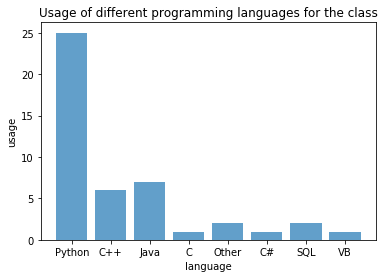

In [8]:
language_types = []
language_counts = []
for key in counter_dict:
    language_types.append(key)
    language_counts.append(counter_dict[key])

pos = np.arange(len(language_types))
plt.bar(pos, language_counts, align='center', alpha=0.7)
plt.xticks(pos, language_types)
plt.xlabel('language')
plt.ylabel('usage')
plt.title('Usage of different programming languages of the class')
plt.show()

## Problem 4

In [27]:
def get_reaction_rate_coefficient(T, params, R=8.314):
    if T <= 0: 
        raise Exception('Temperature T must be positive.')
    if len(params) != 3:
        raise Exception('Length of params must be 3 in the order of [A, b, E].')
    if params[0] <= 0:
        raise Exception('A must be positive.')
    A = params[0]
    b = params[1]
    E = params[2]
    return A * pow(T, b) * math.exp((-1)*E/(R*T))


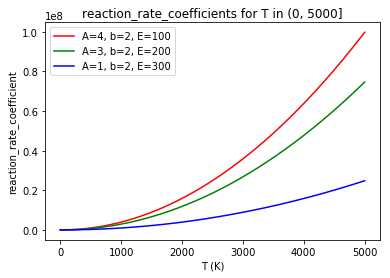

In [34]:
# Generate results using 3 different sets of parameters A, b, E 
params_sets = [[4, 2, 100], [3, 2, 200],[1, 2, 300]]
T_list = np.linspace(0, 5001, 10001)[1:]
results = []
for params in params_sets:
    rate_list = []
    for T in T_list:
        rate_list.append(get_reaction_rate_coefficient(T, params))
    results.append(rate_list)

# Plot the three lines using 3 different sets of parameters A, b, E 
plot_styles = ['r', 'g', 'b']
for i in range(len(results)):
    label_str = 'A='+str(params_sets[i][0])+', b='+str(params_sets[i][1])+', E='+str(params_sets[i][2])
    plt.plot(T_list, results[i], plot_styles[i], label=label_str)

plt.xlabel('T (K)')
plt.ylabel('reaction_rate_coefficient')
plt.title('reaction_rate_coefficients for T in (0, 5000]')
plt.legend()
plt.show()